## Student Performance Indicator


#### Life cycle of Machine learning Project

- Understanding the Problem Statement
- Data Collection
- Data Checks to perform
- Exploratory data analysis
- Data Pre-Processing
- Model Training
- Choose best model

### 1) Problem statement
- This project understands how the student's performance (test scores) is affected by other variables such as Gender, Ethnicity, Parental level of education, Lunch and Test preparation course.


### 2) Data Collection
- Dataset Source - https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?datasetId=74977
- The data consists of 8 column and 1000 rows.

### 2.1 Import Data and Required Packages
####  Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

#### Import the CSV Data as Pandas DataFrame

In [2]:
df = pd.read_csv('data/stud.csv')

#### Show Top 5 Records

In [3]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


#### Shape of the dataset

In [4]:
df.shape

(1000, 8)

### 2.2 Dataset information

- gender : sex of students 
- race/ethnicity : ethnicity of students 
- parental level of education : parents' final education 
- lunch : having lunch before test 
- test preparation course : complete or not complete before test
- math score
- reading score
- writing score

### 3. Preferming Data Checks

- Check and remove Missing values
- Check and remove Duplicates
- Check data types of all the columns
- Check the number of unique values of each column
- Check statistics of data set
- Check various categories present in the different categorical column

### 3.1 Check Missing values

In [5]:
# df = df.dropna()

In [6]:
df.isna().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

#### There are no missing values present in the df

### 3.2 Check Duplicates

In [7]:
# df = df.drop_duplicates()

In [8]:
df.duplicated().sum()

0

#### There are no duplicates values present in the df

### 3.3 Check data types

In [9]:
# Check Dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


### 3.4 Checking the number of unique values of each column

In [10]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

### 3.5 Check statistics of data set

In [11]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


#### Insight
- For all three score, mean and std are closer to each other
- minimum score for math is 0 while other scores much higher 

### 3.7 Exploring Data

In [12]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [13]:
print("Categories in 'gender':{x} ".format(x=df['gender'].unique()))

print("Categories in race_ethnicity: {x}".format(x=df['race_ethnicity'].unique()))

print("Categories in 'parental level of education' variable: {x}".format(x=df['parental_level_of_education'].unique()))

print("Categories in 'lunch' variable: {x}".format(x=df['lunch'].unique()))

print("Categories in 'test preparation course' variable: {x}".format(x=df['test_preparation_course'].unique()))


Categories in 'gender':['female' 'male'] 
Categories in race_ethnicity: ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in 'parental level of education' variable: ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in 'lunch' variable: ['standard' 'free/reduced']
Categories in 'test preparation course' variable: ['none' 'completed']


In [14]:
# define numerical & categorical features
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 3 numerical features : ['math_score', 'reading_score', 'writing_score']

We have 5 categorical features : ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


### 3.8 Finding the "Average" Score

In [15]:
df['average'] = (df['math_score'] + df['reading_score'] + df['writing_score'])/3
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667
1,female,group C,some college,standard,completed,69,90,88,82.333333
2,female,group B,master's degree,standard,none,90,95,93,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333
4,male,group C,some college,standard,none,76,78,75,76.333333


In [16]:
reading_full = df[df['reading_score'] == 100]['average'].count()
writing_full = df[df['writing_score'] == 100]['average'].count()
math_full = df[df['math_score'] == 100]['average'].count()

print(f'Number of students with full marks in Maths: {math_full}')
print(f'Number of students with full marks in Writing: {writing_full}')
print(f'Number of students with full marks in Reading: {reading_full}')

Number of students with full marks in Maths: 7
Number of students with full marks in Writing: 14
Number of students with full marks in Reading: 17


In [17]:
reading_less_35 = df[df['reading_score'] <= 35]['average'].count()
writing_less_35 = df[df['writing_score'] <= 35]['average'].count()
math_less_35 = df[df['math_score'] <= 35]['average'].count()

print(f'Number of students with less than 35 marks in Maths: {math_less_35}')
print(f'Number of students with less than 35 marks in Writing: {writing_less_35}')
print(f'Number of students with less than 35 marks in Reading: {reading_less_35}')

Number of students with less than 35 marks in Maths: 27
Number of students with less than 35 marks in Writing: 18
Number of students with less than 35 marks in Reading: 15


#####  Insights
 - From above values we get students have performed the worst in Maths 
 - Best performance is in reading section

### 4. Exploring Data ( Visualization )
#### 4.1 Visualize average score distribution to make some conclusion. 
- Histogram
- Kernel Distribution Function (KDE)

#### 4.1.1 Histogram & KDE

<Axes: xlabel='average', ylabel='Count'>

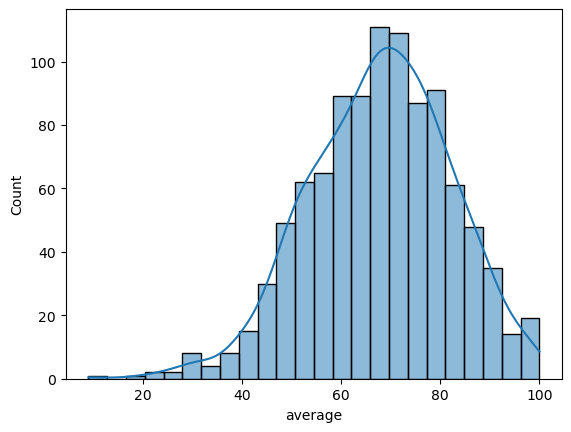

In [18]:
sns.histplot(data=df, x='average', kde=True)

<Axes: xlabel='average', ylabel='Count'>

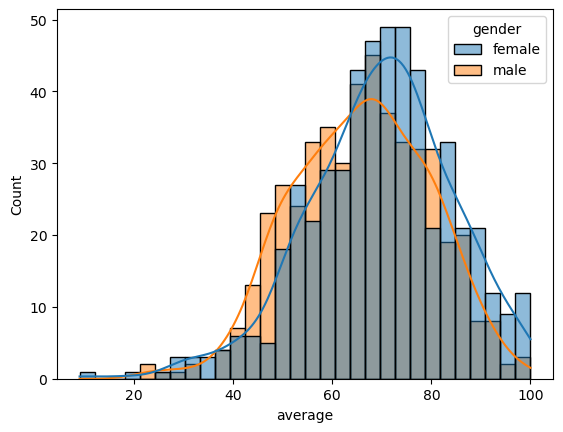

In [19]:
sns.histplot(data=df, x='average', kde=True, bins=30, hue='gender')

#####  Insights
- Females have higher avg than Males

In [42]:
lunch_counts = df['lunch'].value_counts()
min_lunch_count = lunch_counts.min()

balanced_lunch_df = pd.concat([
    df[df['lunch'] == lunch].sample(n=min_lunch_count, random_state=42)
    for lunch in lunch_counts.index
])

balanced_lunch_df = balanced_lunch_df.sample(frac=1, random_state=42).reset_index(drop=True)
balanced_lunch_df.head()


,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,average
0,male,group B,high school,standard,completed,73,69,68,70.000000
1,male,group E,some college,standard,none,76,71,72,73.000000
2,female,group D,some college,free/reduced,none,77,86,86,83.000000
3,female,group C,bachelor's degree,free/reduced,none,50,60,59,56.333333
4,female,group E,high school,standard,completed,59,63,75,65.666667


In [43]:
balanced_lunch_df['lunch'].value_counts()

lunch
standard        355
free/reduced    355
Name: count, dtype: int64

<Axes: xlabel='average', ylabel='Count'>

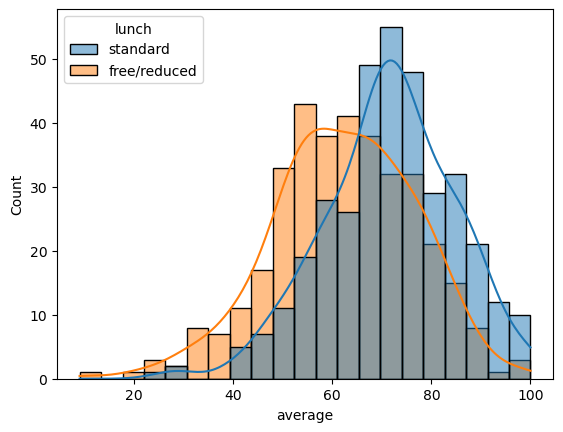

In [27]:
sns.histplot(data=balanced_lunch_df,x='average',kde=True,hue='lunch',hue_order=['standard','free/reduced'])

<Axes: xlabel='average', ylabel='Count'>

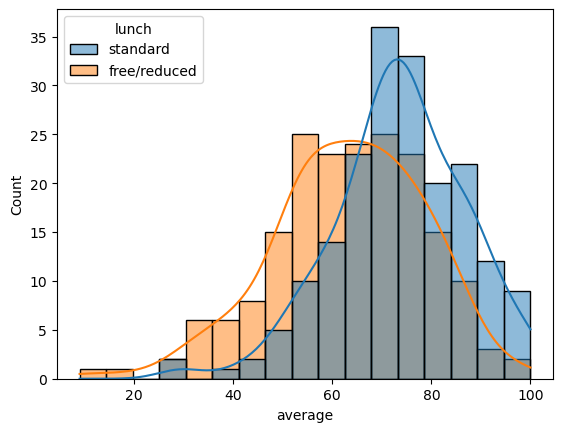

In [28]:
sns.histplot(data=balanced_lunch_df[balanced_lunch_df.gender=='female'],x='average',kde=True,hue='lunch',hue_order=['standard','free/reduced'])

<Axes: xlabel='average', ylabel='Count'>

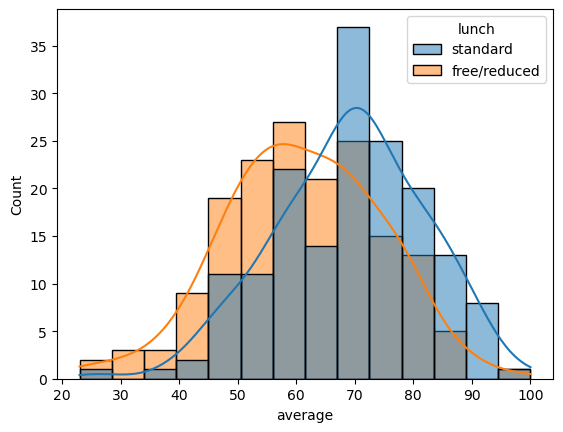

In [29]:
sns.histplot(data=balanced_lunch_df[balanced_lunch_df.gender=='male'],x='average',kde=True,hue='lunch',hue_order=['standard','free/reduced'])

#####  Insights
- since the top of the free/reduced lunch tops at the lower avg, we can conclude that standard lunch helps get better score in exams.
- This conclusion stands true for male and female.

In [34]:
df['parental_level_of_education'].value_counts()

parental_level_of_education
some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: count, dtype: int64

In [36]:
education_counts = df['parental_level_of_education'].value_counts()
min_education_count = education_counts.min()

balanced_education_df = pd.concat([
    df[df['parental_level_of_education'] == education].sample(n=min_education_count, random_state=42)
    for education in education_counts.index
])

balanced_education_df = balanced_education_df.sample(frac=1, random_state=42).reset_index(drop=True)
balanced_education_df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,average
0,male,group C,some high school,standard,none,51,52,44,49.000000
1,female,group D,some college,standard,completed,69,79,81,76.333333
2,male,group D,bachelor's degree,standard,completed,67,61,68,65.333333
3,female,group C,some high school,standard,none,63,73,68,68.000000
4,female,group E,some college,standard,completed,63,72,70,68.333333


In [37]:
balanced_education_df['parental_level_of_education'].value_counts()

parental_level_of_education
some high school      59
some college          59
bachelor's degree     59
high school           59
master's degree       59
associate's degree    59
Name: count, dtype: int64

<Axes: xlabel='average', ylabel='Count'>

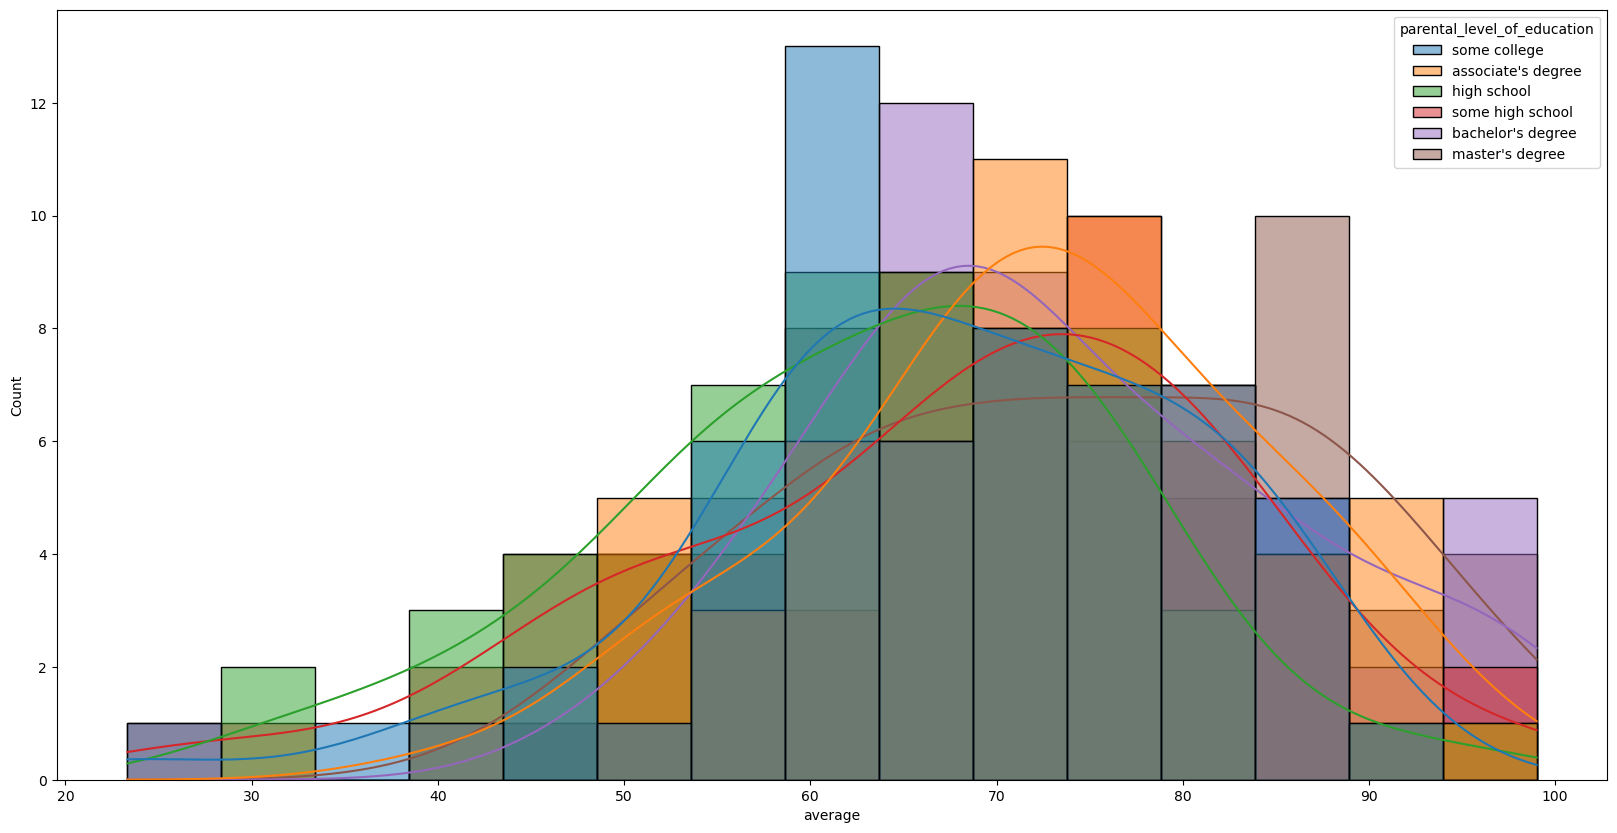

In [39]:
plt.figure(figsize=(20,10))
sns.histplot(data=balanced_education_df,x='average',kde=True,hue='parental_level_of_education',hue_order=education_counts.index)

<Axes: xlabel='average', ylabel='Count'>

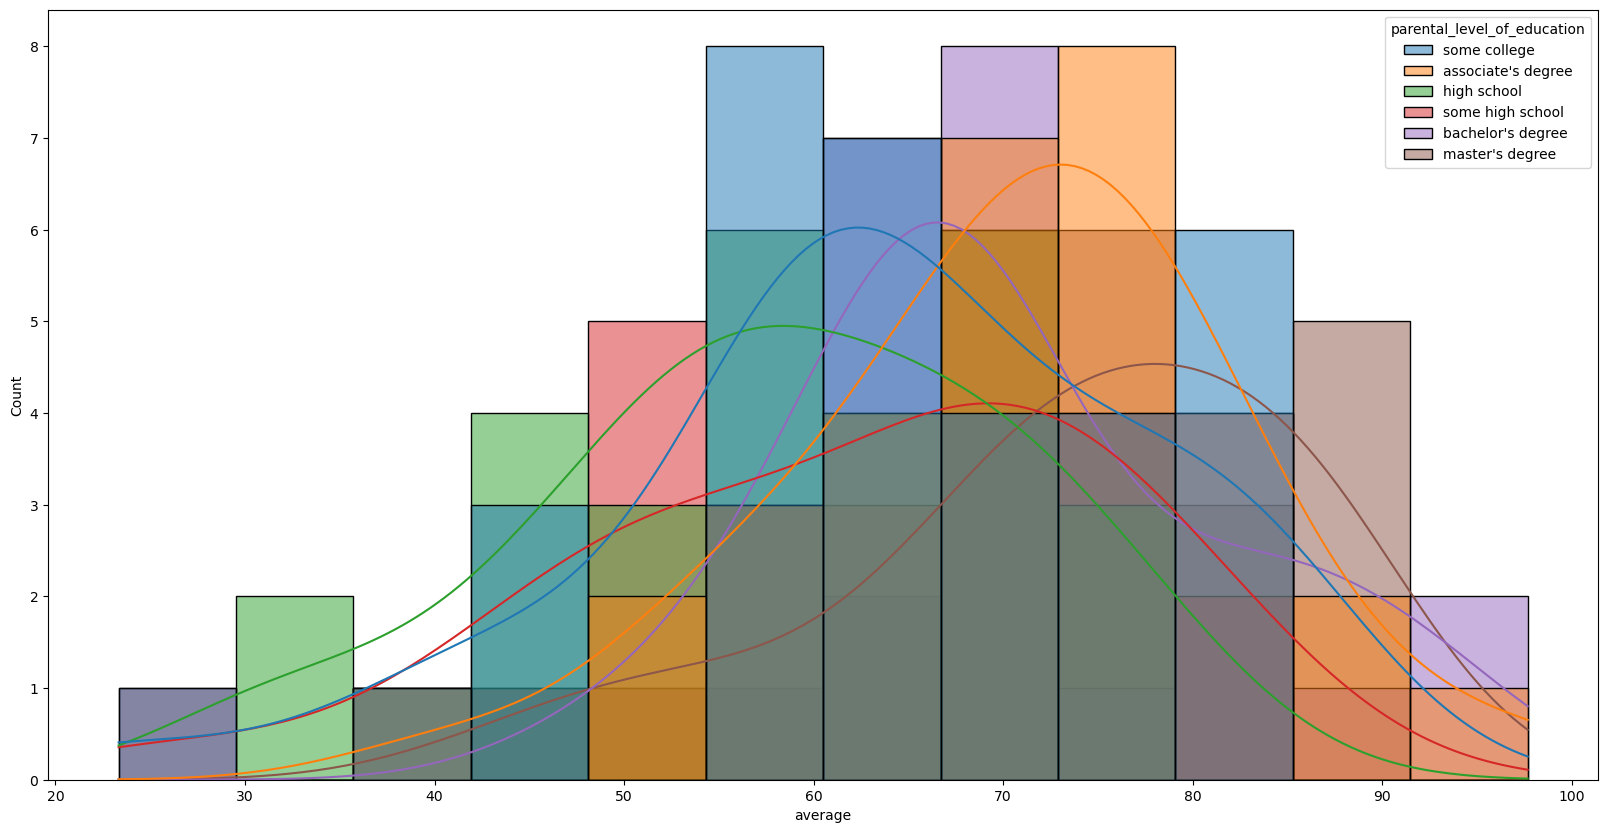

In [40]:
plt.figure(figsize=(20,10))
sns.histplot(data=balanced_education_df[balanced_education_df.gender =='male'],x='average',kde=True,hue='parental_level_of_education',hue_order=education_counts.index)

<Axes: xlabel='average', ylabel='Count'>

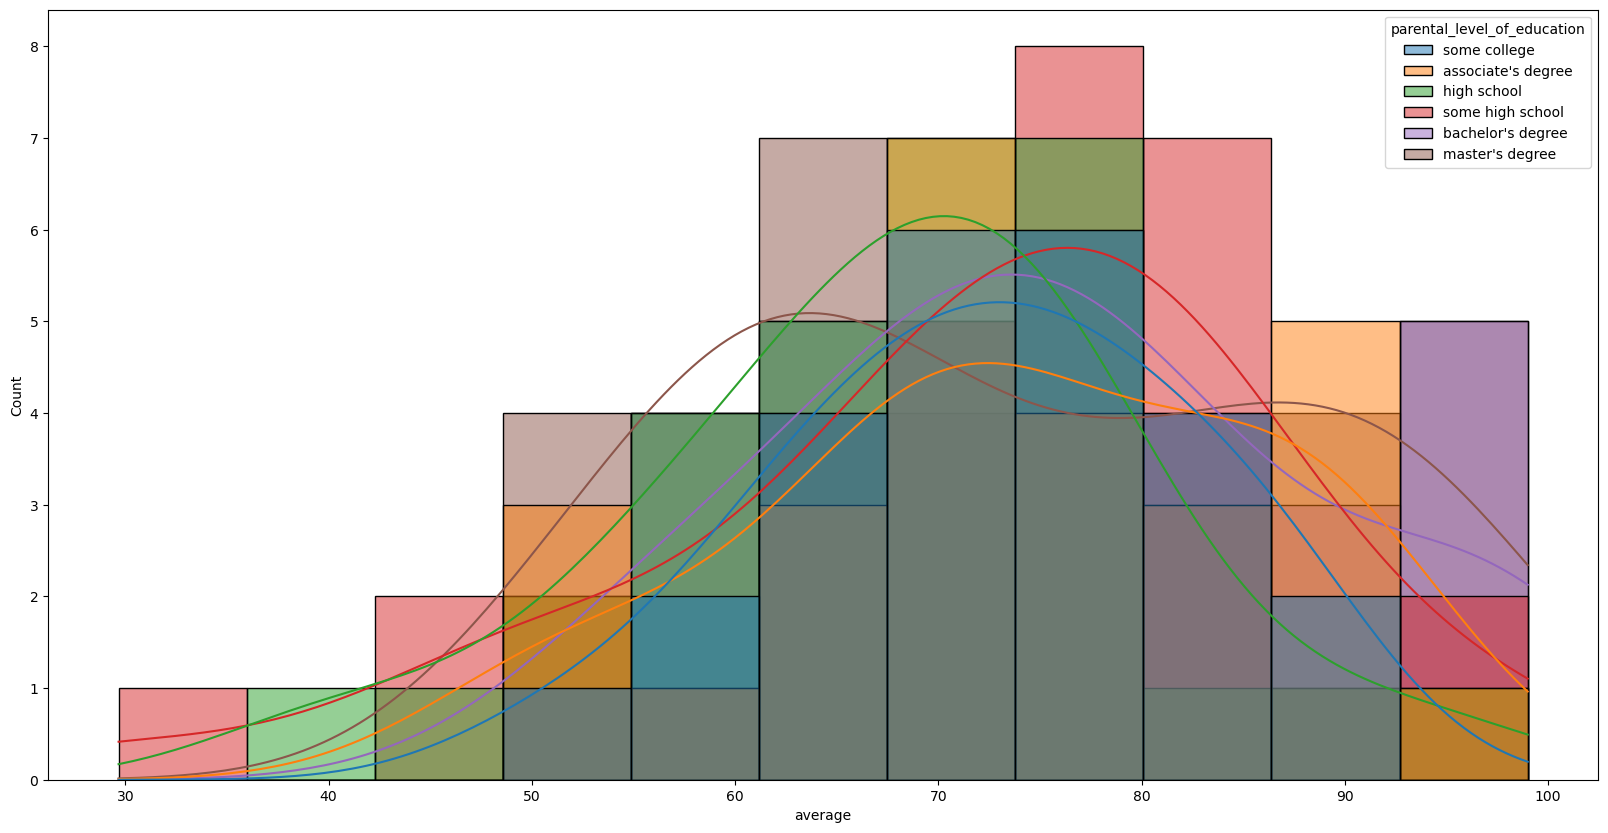

In [41]:
plt.figure(figsize=(20,10))
sns.histplot(data=balanced_education_df[balanced_education_df.gender =='female'],x='average',kde=True,hue='parental_level_of_education',hue_order=education_counts.index)

#####  Insights
- In general, parent's education don't have any affect on student's performance in exam.
- Male students whose parent's education is associate's degree or master's degree have slightly better performance then rest.
- Female students doesnt show any correlation with parent's education with test performance.

In [53]:
df['race_ethnicity'].value_counts()

race_ethnicity
group C    319
group D    262
group B    190
group E    140
group A     89
Name: count, dtype: int64

In [50]:
race_counts = df['race_ethnicity'].value_counts()
min_race_count = race_counts.min()

balanced_race_df = pd.concat([
    df[df['race_ethnicity'] == race].sample(n=min_race_count, random_state=42)
    for race in race_counts.index
])

balanced_race_df = balanced_race_df.sample(frac=1, random_state=42).reset_index(drop=True)
balanced_race_df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,average
0,male,group E,bachelor's degree,standard,none,82,62,62,68.666667
1,male,group A,some college,standard,none,53,43,43,46.333333
2,male,group D,some college,free/reduced,none,59,62,61,60.666667
3,male,group A,high school,standard,none,68,70,66,68.000000
4,female,group C,associate's degree,standard,none,40,59,51,50.000000


In [54]:
balanced_race_df['race_ethnicity'].value_counts()

race_ethnicity
group E    89
group A    89
group D    89
group C    89
group B    89
Name: count, dtype: int64

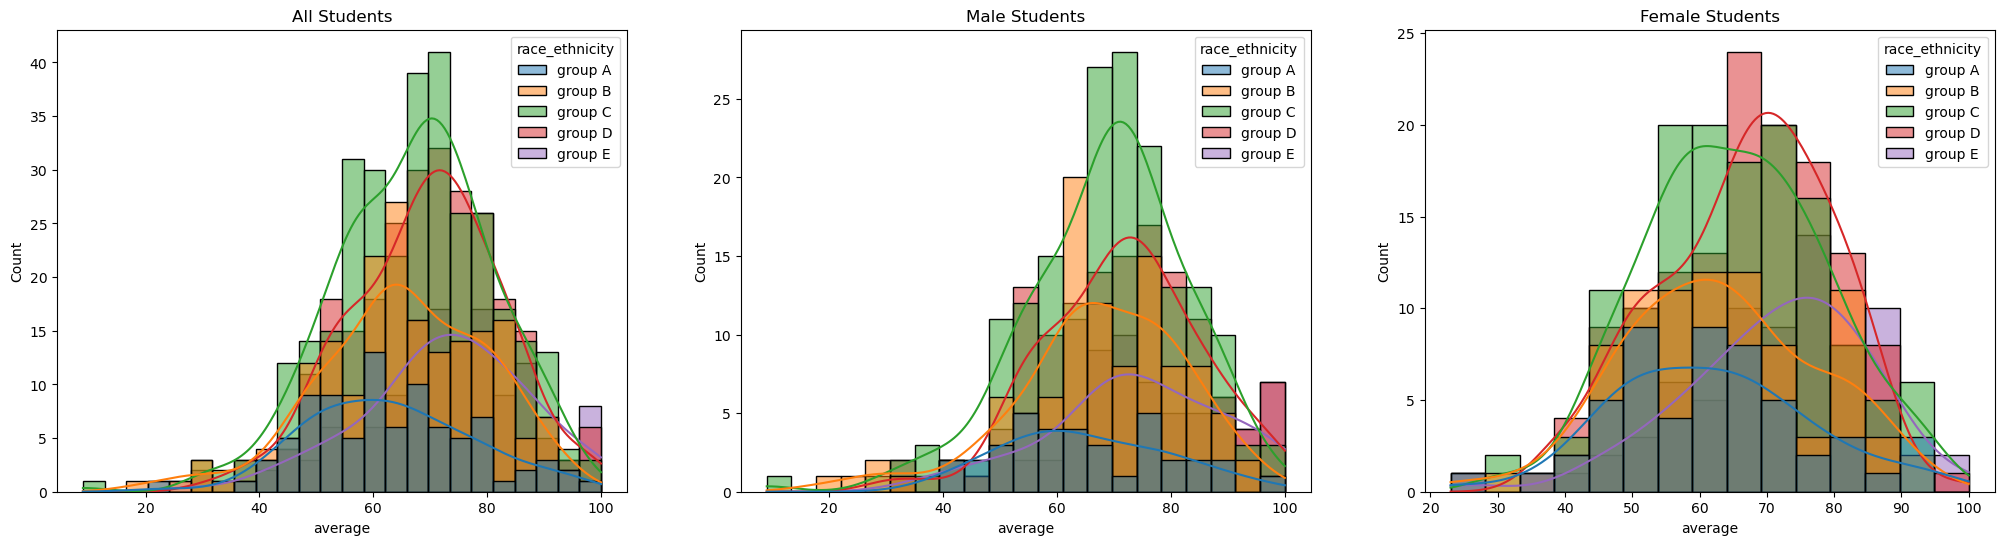

In [64]:
fig, axes = plt.subplots(1, 3, figsize=(25, 6))
sns.histplot(data=df,x='average',kde=True,hue='race_ethnicity',hue_order=['group A','group B','group C','group D','group E'],ax=axes[0])
axes[0].set_title('All Students')
sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='race_ethnicity',hue_order=['group A','group B','group C','group D','group E'],ax=axes[1])
axes[1].set_title('Male Students')
sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='race_ethnicity',hue_order=['group A','group B','group C','group D','group E'],ax=axes[2])
axes[2].set_title('Female Students')
plt.show()

#####  Insights
- Students of group A has the worst performance in exam.
- Students of group A tends to perform poorly in exam irrespective of whether they are male or female

#### 4.2 Score Disttribution of students in all subject

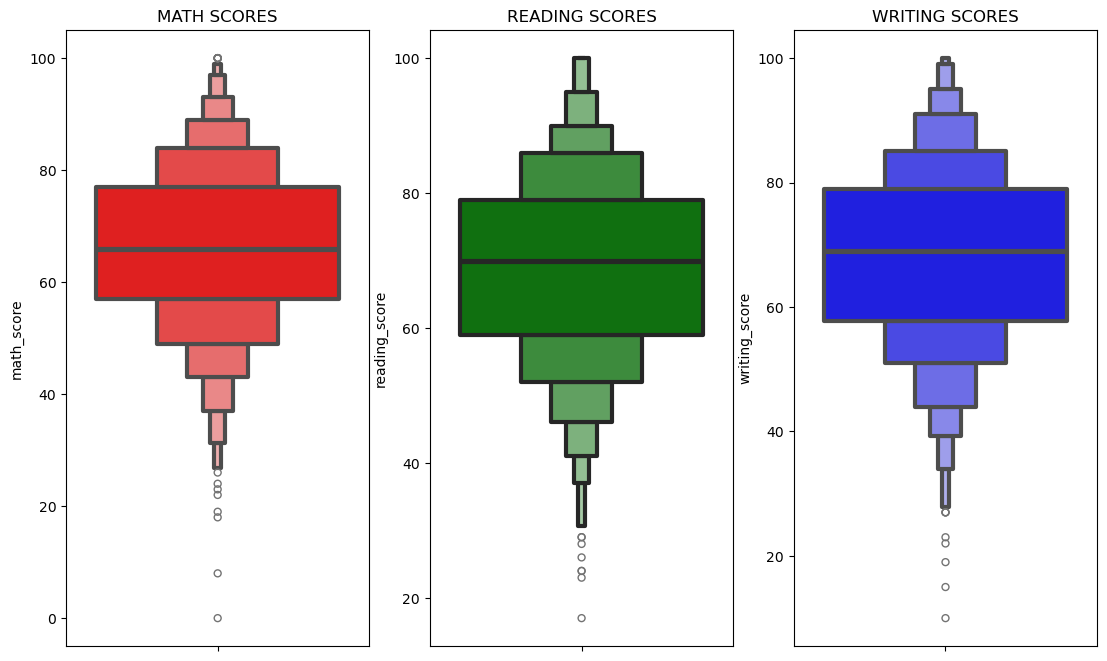

In [57]:

plt.figure(figsize=(18,8))
plt.subplot(1, 4, 1)
plt.title('MATH SCORES')
sns.boxenplot(y='math_score', data=df, color='red', linewidth=3)
plt.subplot(1, 4, 2)
plt.title('READING SCORES')
sns.boxenplot(y='reading_score', data=df, color='green', linewidth=3)
plt.subplot(1, 4, 3)
plt.title('WRITING SCORES')
sns.boxenplot(y='writing_score', data=df, color='blue', linewidth=3)
plt.show()

#### Insights
- more students have scored 100s in reading and writing.
- only couple of students have scored 100 in maths
- most students have scored from 60 to 80 in all three subjects.


#### 4.3 Multivariate analysis using pieplot

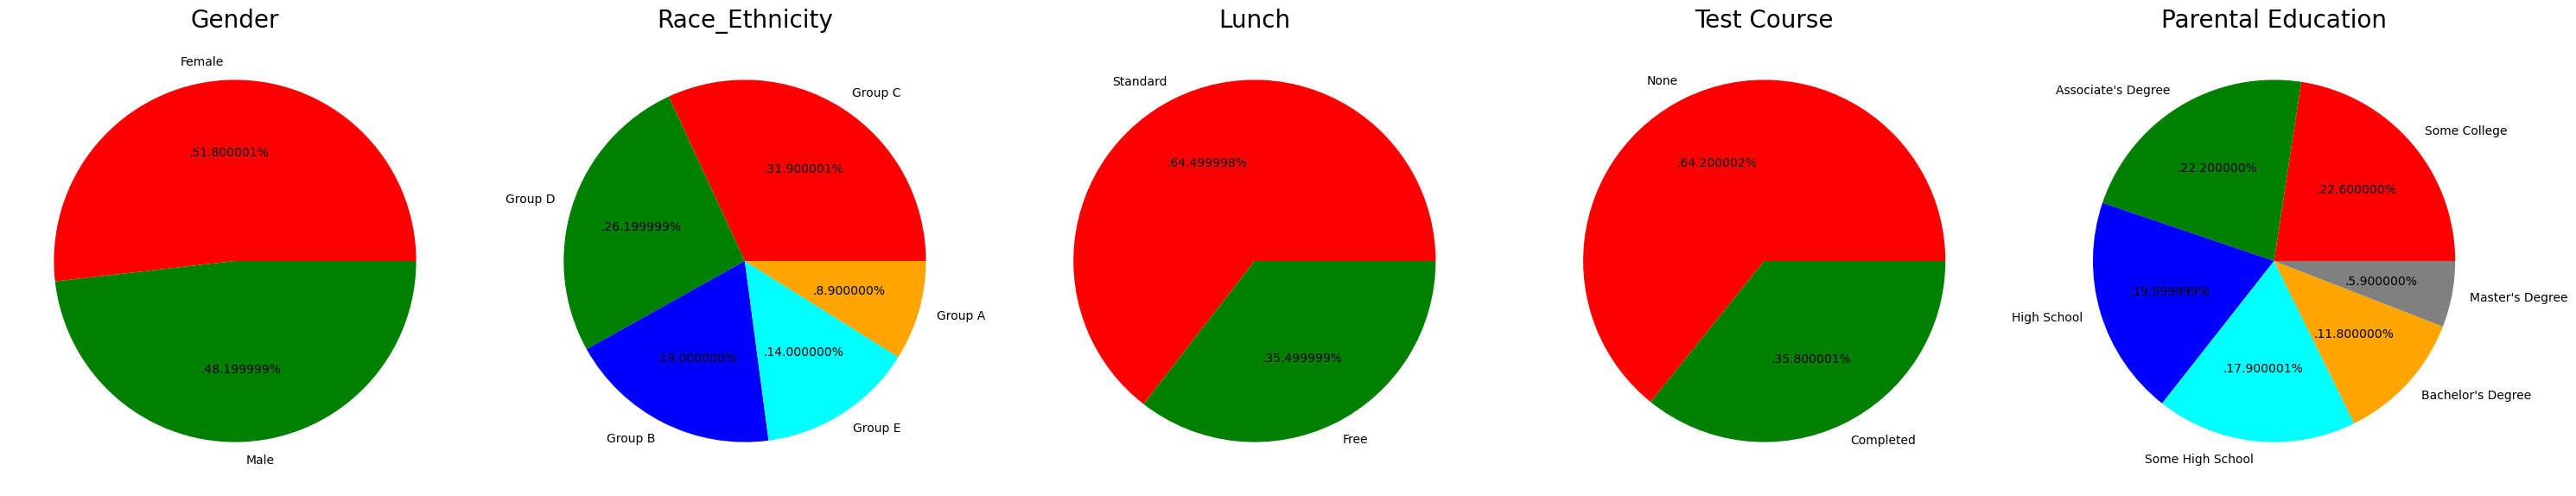

In [66]:
plt.rcParams['figure.figsize'] = (30, 12)

plt.subplot(1, 5, 1)
size = df['gender'].value_counts()
labels = 'Female', 'Male'
color = ['red','green']


plt.pie(size, colors = color, labels = labels,autopct = '.%2f%%')
plt.title('Gender', fontsize = 20)
plt.axis('off')



plt.subplot(1, 5, 2)
size = df['race_ethnicity'].value_counts()
labels = 'Group C', 'Group D','Group B','Group E','Group A'
color = ['red', 'green', 'blue', 'cyan','orange']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Race_Ethnicity', fontsize = 20)
plt.axis('off')



plt.subplot(1, 5, 3)
size = df['lunch'].value_counts()
labels = 'Standard', 'Free'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Lunch', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 4)
size = df['test_preparation_course'].value_counts()
labels = 'None', 'Completed'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Test Course', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 5)
size = df['parental_level_of_education'].value_counts()
labels = 'Some College', "Associate's Degree",'High School','Some High School',"Bachelor's Degree","Master's Degree"
color = ['red', 'green', 'blue', 'cyan','orange','grey']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Parental Education', fontsize = 20)
plt.axis('off')


plt.tight_layout()
plt.grid()

plt.show()

#####  Insights
- Number of Male and Female students is almost equal
- Number students are greatest in Group C
- Number of students who have standard lunch are greater
- Number of students who have not enrolled in any test preparation course is greater
- Number of students whose parental education is "Some College" is greater followed closely by "Associate's Degree"

#### 4.4 Feature Wise Visualization
#### 4.4.1 GENDER COLUMN
- How is distribution of Gender ?
- Is gender has any impact on student's performance ?

#### UNIVARIATE ANALYSIS ( How is distribution of Gender ? )

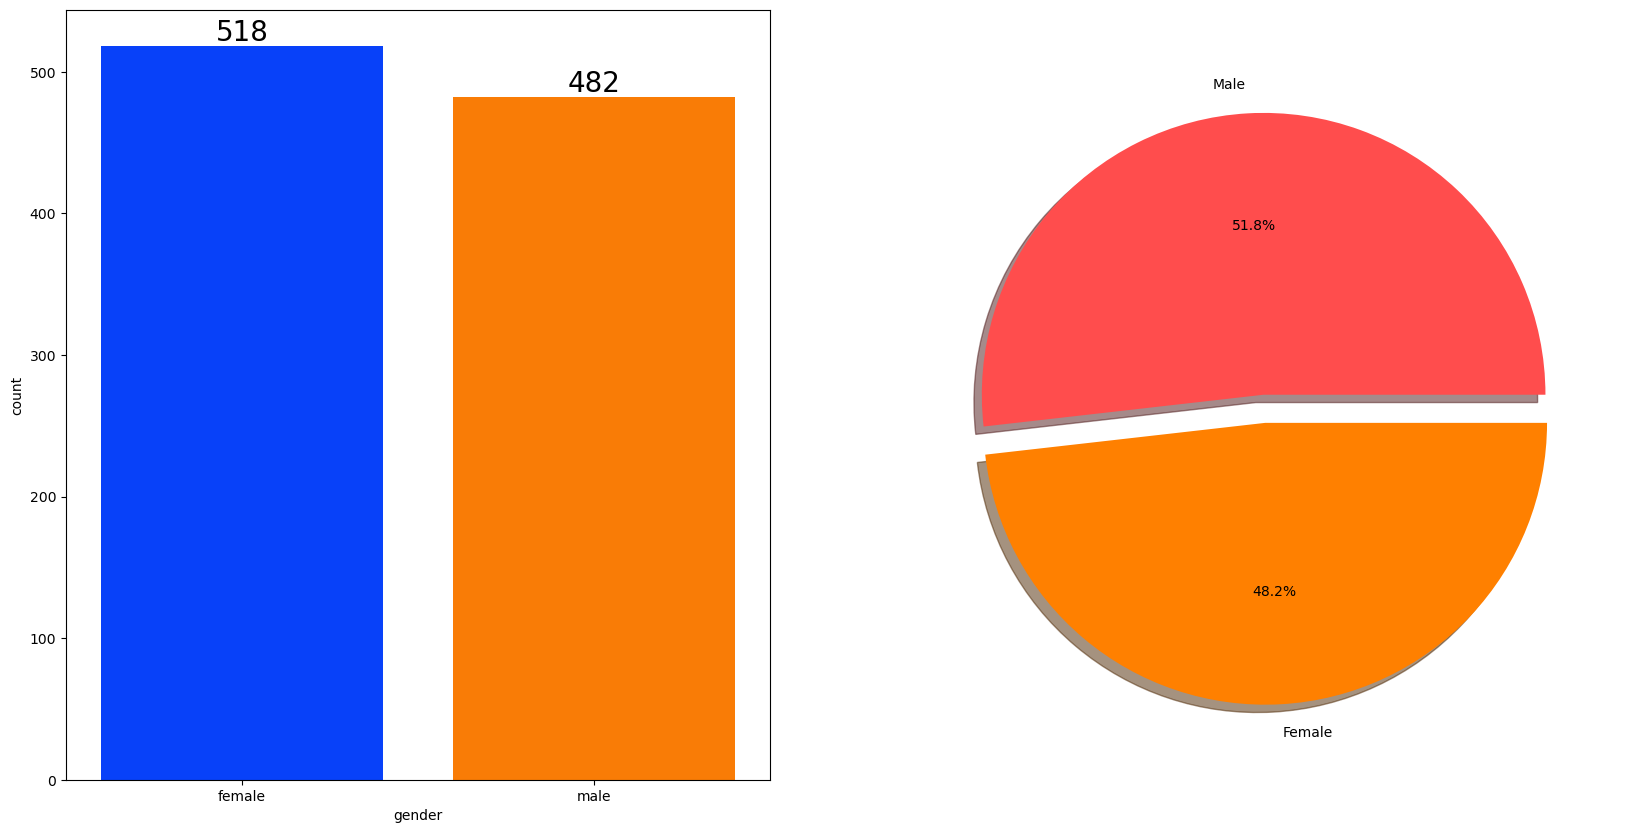

In [67]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['gender'],data=df,palette ='bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x=df['gender'].value_counts(),labels=['Male','Female'],explode=[0,0.1],autopct='%1.1f%%',shadow=True,colors=['#ff4d4d','#ff8000'])
plt.show()

#### Insights 
- Gender has balanced data with female students are 518 (48%) and male students are 482 (52%) 

#### BIVARIATE ANALYSIS ( Is gender has any impact on student's performance ? ) 

In [69]:
gender_group = df.groupby('gender')[['math_score', 'reading_score', 'writing_score', 'average']].mean()
gender_group

,math_score,reading_score,writing_score,average
gender,,,,
female,63.633205,72.608108,72.467181,69.569498
male,68.728216,65.473029,63.311203,65.837483


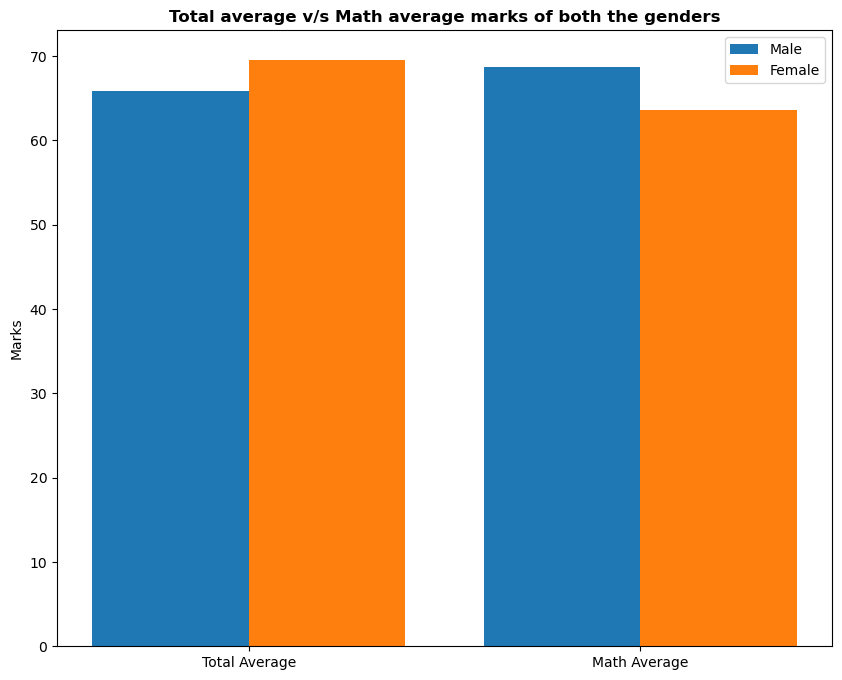

In [71]:
plt.figure(figsize=(10, 8))

X = ['Total Average','Math Average']


female_scores = [gender_group['average'][0], gender_group['math_score'][0]]
male_scores = [gender_group['average'][1], gender_group['math_score'][1]]

X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, male_scores, 0.4, label = 'Male')
plt.bar(X_axis + 0.2, female_scores, 0.4, label = 'Female')
  
plt.xticks(X_axis, X)
plt.ylabel("Marks")
plt.title("Total average v/s Math average marks of both the genders", fontweight='bold')
plt.legend()
plt.show()

#### Insights 
- On an average females have a better overall score than men.
- whereas males have scored higher in Maths.

#### 4.4.2 RACE/EHNICITY COLUMN
- How is Group wise distribution ?
- Is Race/Ehnicity has any impact on student's performance ?

#### UNIVARIATE ANALYSIS ( How is Group wise distribution ?)

In [ ]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['race/ethnicity'],data=df,palette = 'bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x = df['race/ethnicity'].value_counts(),labels=df['race/ethnicity'].value_counts().index,explode=[0.1,0,0,0,0],autopct='%1.1f%%',shadow=True)
plt.show()   

#### Insights 
- Most of the student belonging from group C /group D.
- Lowest number of students belong to groupA.

#### BIVARIATE ANALYSIS ( Is Race/Ehnicity has any impact on student's performance ? )

In [ ]:
Group_data2=df.groupby('race/ethnicity')
f,ax=plt.subplots(1,3,figsize=(20,8))
sns.barplot(x=Group_data2['math score'].mean().index,y=Group_data2['math score'].mean().values,palette = 'mako',ax=ax[0])
ax[0].set_title('Math score',color='#005ce6',size=20)

for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['reading score'].mean().index,y=Group_data2['reading score'].mean().values,palette = 'flare',ax=ax[1])
ax[1].set_title('Reading score',color='#005ce6',size=20)

for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['writing score'].mean().index,y=Group_data2['writing score'].mean().values,palette = 'coolwarm',ax=ax[2])
ax[2].set_title('Writing score',color='#005ce6',size=20)

for container in ax[2].containers:
    ax[2].bar_label(container,color='black',size=15)

#### Insights 
- Group E students have scored the highest marks. 
- Group A students have scored the lowest marks. 
- Students from a lower Socioeconomic status have a lower avg in all course subjects

#### 4.4.3 PARENTAL LEVEL OF EDUCATION COLUMN
- What is educational background of student's parent ?
- Is parental education has any impact on student's performance ?

#### UNIVARIATE ANALYSIS ( What is educational background of student's parent ? )

In [ ]:
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('fivethirtyeight')
sns.countplot(df['parental level of education'], palette = 'Blues')
plt.title('Comparison of Parental Education', fontweight = 30, fontsize = 20)
plt.xlabel('Degree')
plt.ylabel('count')
plt.show()

#### Insights 
- Largest number of parents are from some college.

#### BIVARIATE ANALYSIS ( Is parental education has any impact on student's performance ? )

In [ ]:
df.groupby('parental level of education').agg('mean').plot(kind='barh',figsize=(10,10))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

#### Insights 
- The score of student whose parents possess master and bachelor level education are higher than others.

#### 4.4.4 LUNCH COLUMN 
- Which type of lunch is most common amoung students ?
- What is the effect of lunch type on test results?


#### UNIVARIATE ANALYSIS ( Which type of lunch is most common amoung students ? )

In [42]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

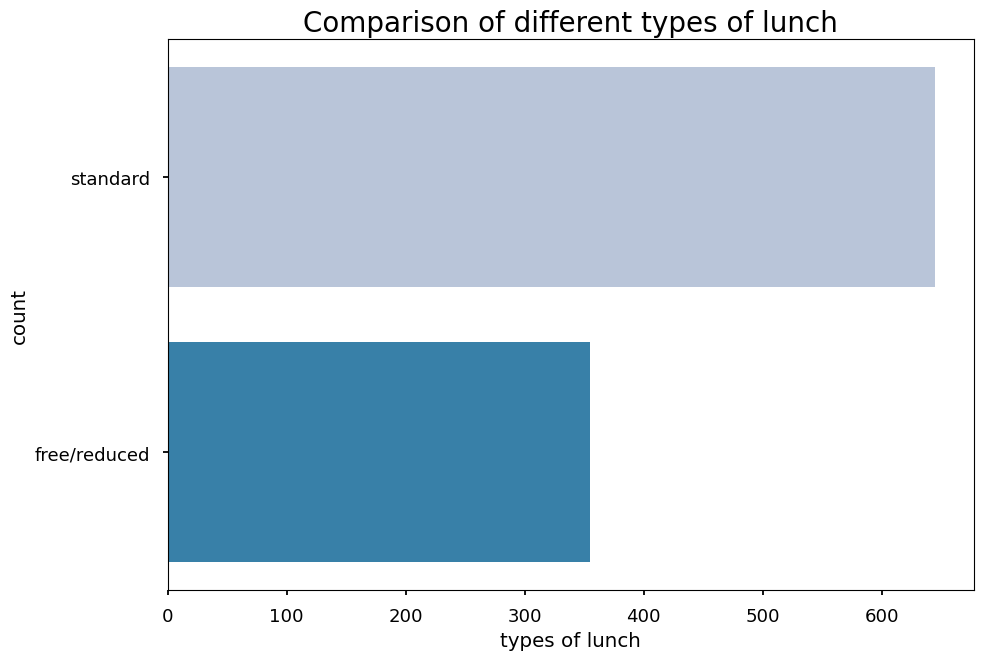

In [43]:
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('seaborn-v0_8-talk')
sns.countplot(df['lunch'], palette = 'PuBu')
plt.title('Comparison of different types of lunch', fontweight = 30, fontsize = 20)
plt.xlabel('types of lunch')
plt.ylabel('count')
plt.show()

#### Insights 
- Students being served Standard lunch was more than free lunch

#### BIVARIATE ANALYSIS (  Is lunch type intake has any impact on student's performance ? )

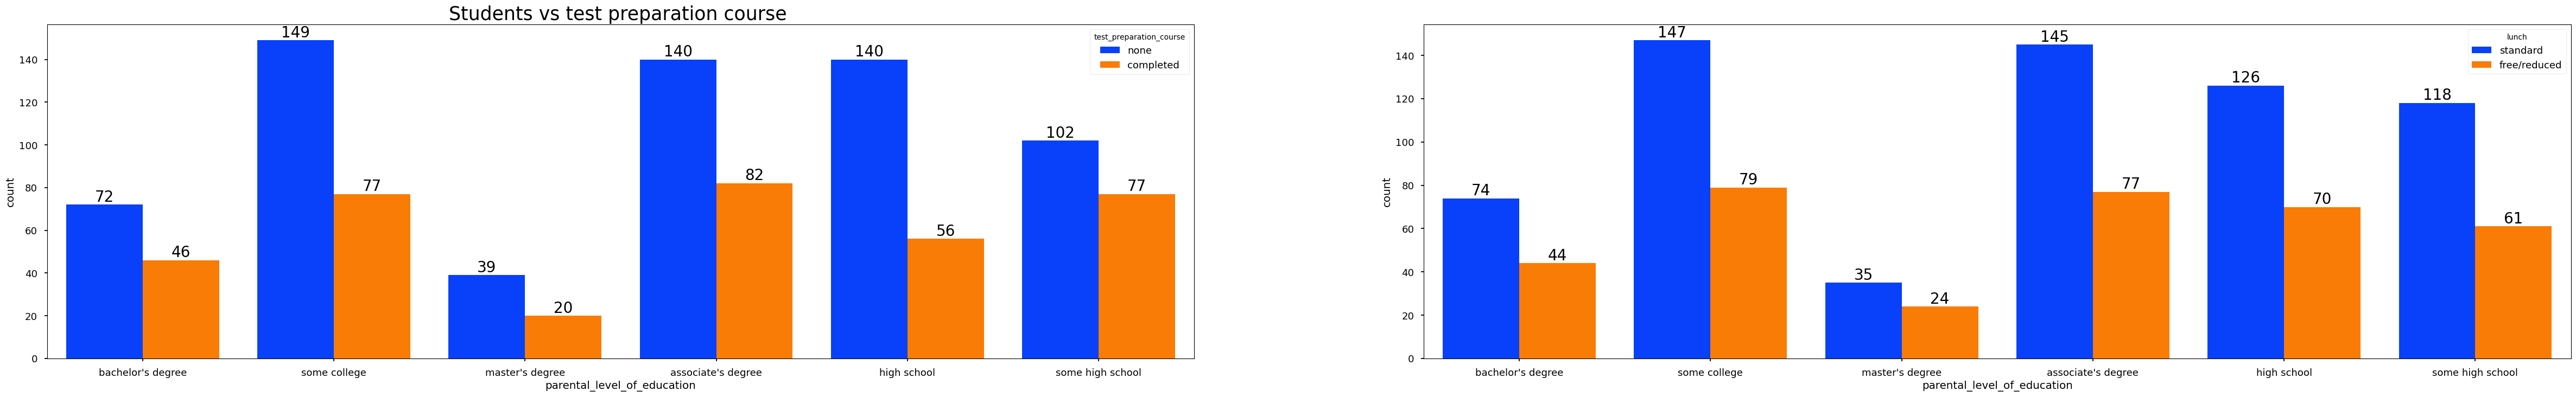

In [ ]:
f,ax=plt.subplots(1,2,figsize=(20,8))
sns.countplot(x=df['parental level of education'],data=df,palette = 'bright',hue='test preparation course',saturation=0.95,ax=ax[0])
ax[0].set_title('Students vs test preparation course ',color='black',size=25)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
sns.countplot(x=df['parental level of education'],data=df,palette = 'bright',hue='lunch',saturation=0.95,ax=ax[1])
for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=20)   

#### Insights 
- Students who get Standard Lunch tend to perform better than students who got free/reduced lunch

#### 4.4.5 TEST PREPARATION COURSE COLUMN 
- Which type of lunch is most common amoung students ?
- Is Test prepration course has any impact on student's performance ?

#### BIVARIATE ANALYSIS ( Is Test prepration course has any impact on student's performance ? )

In [ ]:
plt.figure(figsize=(12,6))
plt.subplot(2,2,1)
sns.barplot (x=df['lunch'], y=df['math score'], hue=df['test preparation course'])
plt.subplot(2,2,2)
sns.barplot (x=df['lunch'], y=df['reading score'], hue=df['test preparation course'])
plt.subplot(2,2,3)
sns.barplot (x=df['lunch'], y=df['writing score'], hue=df['test preparation course'])

#### Insights  
- Students who have completed the Test Prepration Course have scores higher in all three categories than those who haven't taken the course

#### 4.4.6 CHECKING OUTLIERS

In [ ]:
plt.subplots(1,4,figsize=(16,5))
plt.subplot(141)
sns.boxplot(df['math score'],color='skyblue')
plt.subplot(142)
sns.boxplot(df['reading score'],color='hotpink')
plt.subplot(143)
sns.boxplot(df['writing score'],color='yellow')
plt.subplot(144)
sns.boxplot(df['average'],color='lightgreen')
plt.show()

#### 4.4.7 MUTIVARIATE ANALYSIS USING PAIRPLOT

In [ ]:
sns.pairplot(df,hue = 'gender')
plt.show()

#### Insights
- From the above plot it is clear that all the scores increase linearly with each other.

### 5. Conclusions
- Student's Performance is related with lunch, race, parental level education
- Females lead in pass percentage and also are top-scorers
- Student's Performance is not much related with test preparation course
- Finishing preparation course is benefitial.